# INTRODUCTION


Question Statement:


Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

Statistics and Machine Learning can help us answer these questions and predict various relations and variables given the data.


Apparent temperature is the temperature that it feels like to our body because of other weather variables other than temperature. This is generally higher in case of high humidity.

In this project, we try to predict the apparent temperature given other weather variables in an hourly manner.
 

## Objective of this project :

==>Clean the data and drop useless columns.

==>Make a EDA report .

==>Visualize the distributions of various features and correlations between them.

In [28]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Here loading the Weather_data.csv dataset
df=pd.read_csv('C:\\Desktop\Weather_data.csv')

In [30]:
# Showing First five elements 
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [31]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [32]:
#To Know the shape
df.shape

(5999, 12)

In [33]:
# To Know the size
df.size

71988

In [34]:
list(df.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [35]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-01-11 19:00:00.000 +0100,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


# Data Cleaning

Statment:

====> Clean the data and drop useless columns.

                OR
                
----> Perform data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.

In [36]:
# Here is the information of data before cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [37]:
#dropping unnecessary Columns.(Which includes text.)
cols=['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
df=df.drop(cols,axis=1)

In [38]:
# Here Is the conversion of Formated Date From Object to  DateTimeObject
df['Formatted Date']=pd.to_datetime(df['Formatted Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
Formatted Date              5999 non-null datetime64[ns]
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Pressure (millibars)        5999 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 281.3 KB


In [41]:
#Here is the indexing according to Date and Time
df1=df.sort_values(by='Formatted Date')

In [42]:
# Setting Index
df1 = df1.set_index('Formatted Date')
df1.index

DatetimeIndex(['2005-12-31 23:00:00', '2006-01-01 00:00:00',
               '2006-01-01 01:00:00', '2006-01-01 02:00:00',
               '2006-01-01 03:00:00', '2006-01-01 04:00:00',
               '2006-01-01 05:00:00', '2006-01-01 06:00:00',
               '2006-01-01 07:00:00', '2006-01-01 08:00:00',
               ...
               '2006-12-31 13:00:00', '2006-12-31 14:00:00',
               '2006-12-31 15:00:00', '2006-12-31 16:00:00',
               '2006-12-31 17:00:00', '2006-12-31 18:00:00',
               '2006-12-31 19:00:00', '2006-12-31 20:00:00',
               '2006-12-31 21:00:00', '2006-12-31 22:00:00'],
              dtype='datetime64[ns]', name='Formatted Date', length=5999, freq=None)

In [43]:
# Here The Duplicate values in the index are getting remove
df1.index.drop_duplicates(keep='first')

DatetimeIndex(['2005-12-31 23:00:00', '2006-01-01 00:00:00',
               '2006-01-01 01:00:00', '2006-01-01 02:00:00',
               '2006-01-01 03:00:00', '2006-01-01 04:00:00',
               '2006-01-01 05:00:00', '2006-01-01 06:00:00',
               '2006-01-01 07:00:00', '2006-01-01 08:00:00',
               ...
               '2006-12-31 13:00:00', '2006-12-31 14:00:00',
               '2006-12-31 15:00:00', '2006-12-31 16:00:00',
               '2006-12-31 17:00:00', '2006-12-31 18:00:00',
               '2006-12-31 19:00:00', '2006-12-31 20:00:00',
               '2006-12-31 21:00:00', '2006-12-31 22:00:00'],
              dtype='datetime64[ns]', name='Formatted Date', length=5999, freq=None)

In [44]:
# Here is the data after cleaning
df1.dropna()
df1.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [45]:
# Here is the information about data after cleaning
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999 entries, 2005-12-31 23:00:00 to 2006-12-31 22:00:00
Data columns (total 5 columns):
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Pressure (millibars)        5999 non-null float64
dtypes: float64(5)
memory usage: 441.2 KB


# EXPLORATORY DATA ANALYSIS :

Statement:

=====> Make a EDA report.

=====> Visualize the distributions of various features and correlations between them.

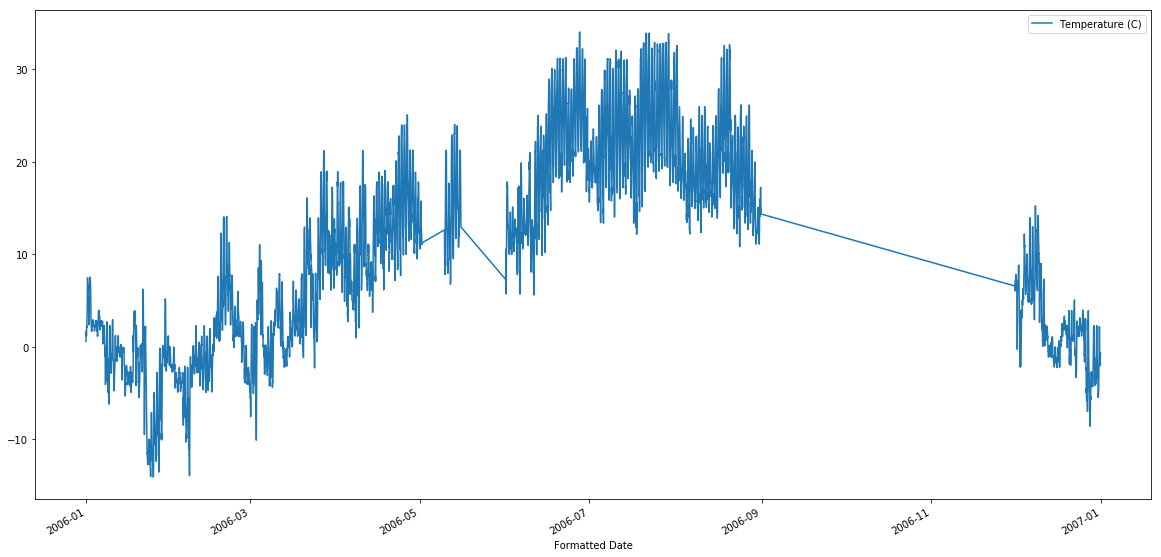

In [46]:
#plotting the data
df1.plot(y="Temperature (C)",figsize=(20,10))

# Here the Data is too Congested so we need to Resample it in Days

In [47]:
# Here is the resampling of data into day format
df2= df1.resample(rule='D').mean()
df2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04,2.251852,-0.663194,0.906667,12.152817,981.770833


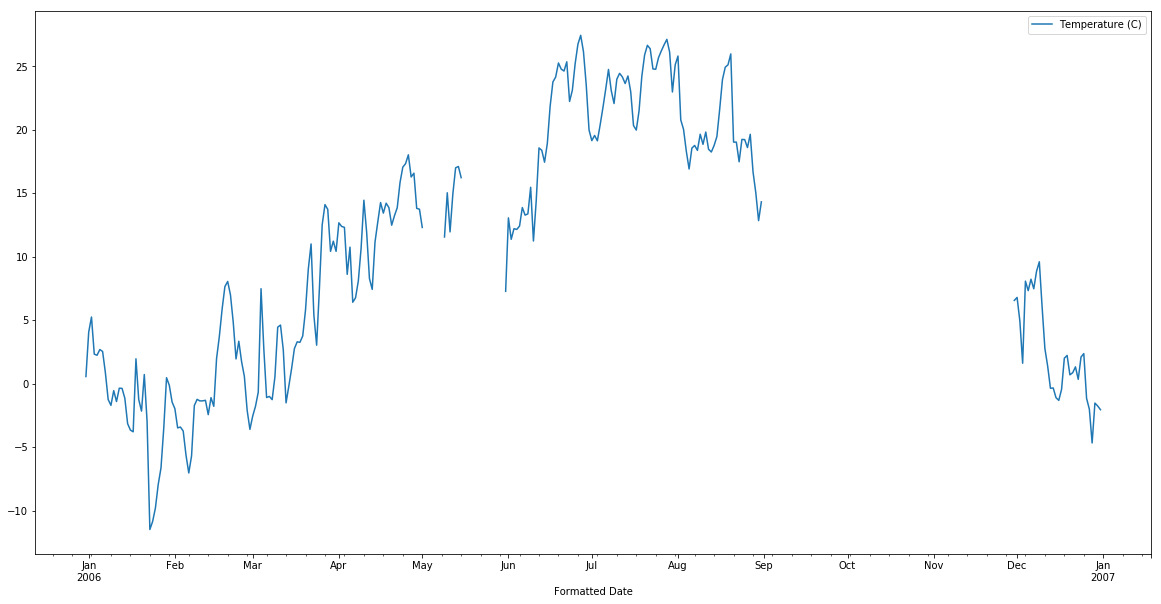

In [22]:
# Here is the resampling of data into day format
df2.plot(y="Temperature (C)",figsize=(20,10))

# Here As we can see that the data is not complete in the month of May,Sep,Oct and Nov :

Taking The data of January Only :

In [51]:
#extracting data from the month of January
jan2006 = df1['2006-01-01':'2006-01-31']
jan2006

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00,1.205556,-3.072222,0.85,15.9068,1014.08
2006-01-01 05:00:00,2.222222,-2.494444,0.79,20.5597,1013.93
2006-01-01 06:00:00,2.072222,-3.272222,0.81,25.4219,1013.24
2006-01-01 07:00:00,2.200000,-2.850000,0.80,23.1679,1013.19
2006-01-01 08:00:00,2.733333,-2.133333,0.82,22.8781,1013.29


C:\Users\risha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


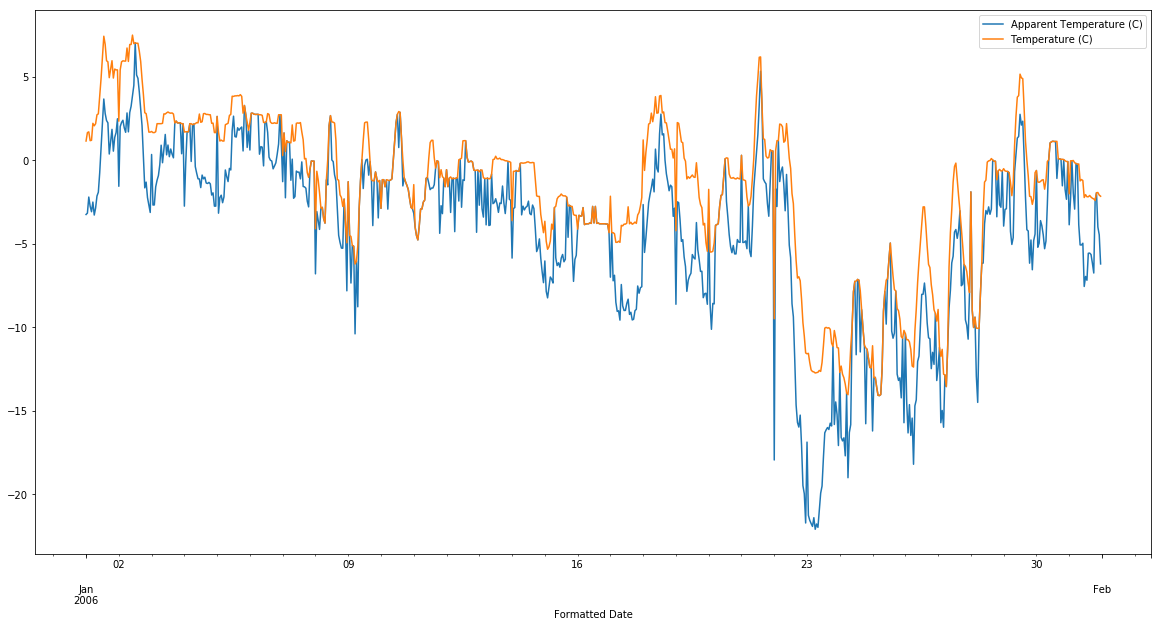

In [52]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

# Here the Data is too Congested so we need to Resample it in Days

In [53]:
#resampling
JAN = jan2006.resample(rule='D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05,2.703935,0.445833,0.951250,8.991179,935.873750


C:\Users\risha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


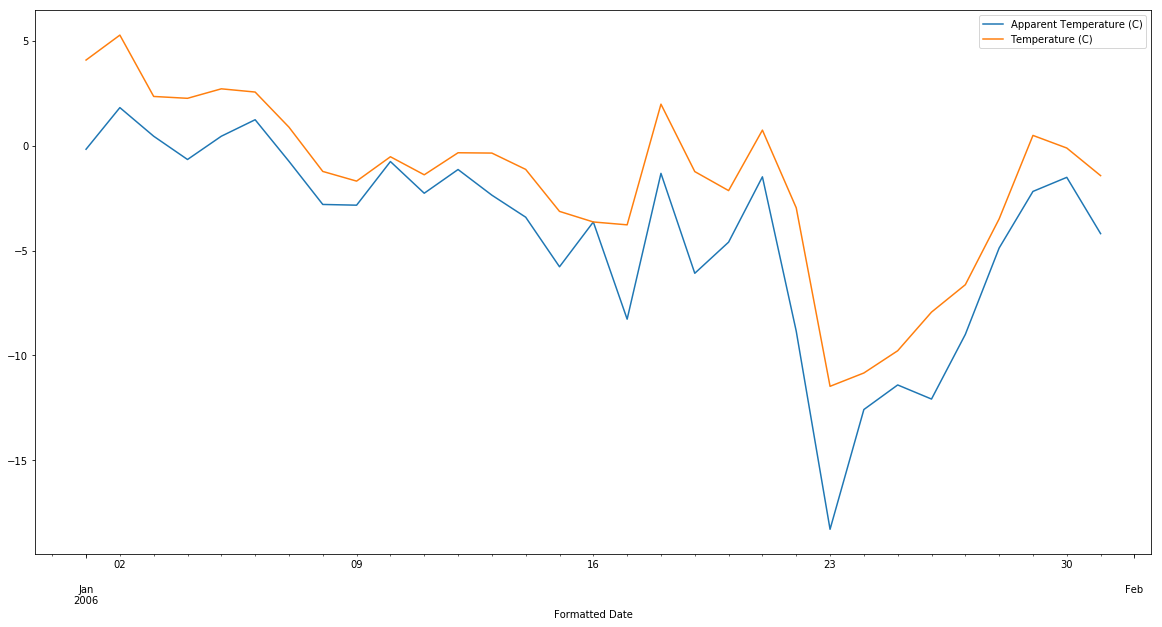

In [54]:
JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

# Now the difference in Apperent Temperature and Temperature is easily clear.

# Now Plotting as per Seasons.

In [55]:
winter = df2['2006-01-01':'2006-02-28']
winter2 = df2['2006-12-01':'2006-12-31']
spring = df2['2006-03-01':'2006-05-31']
summer = df2['2006-06-01':'2006-08-31']

C:\Users\risha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


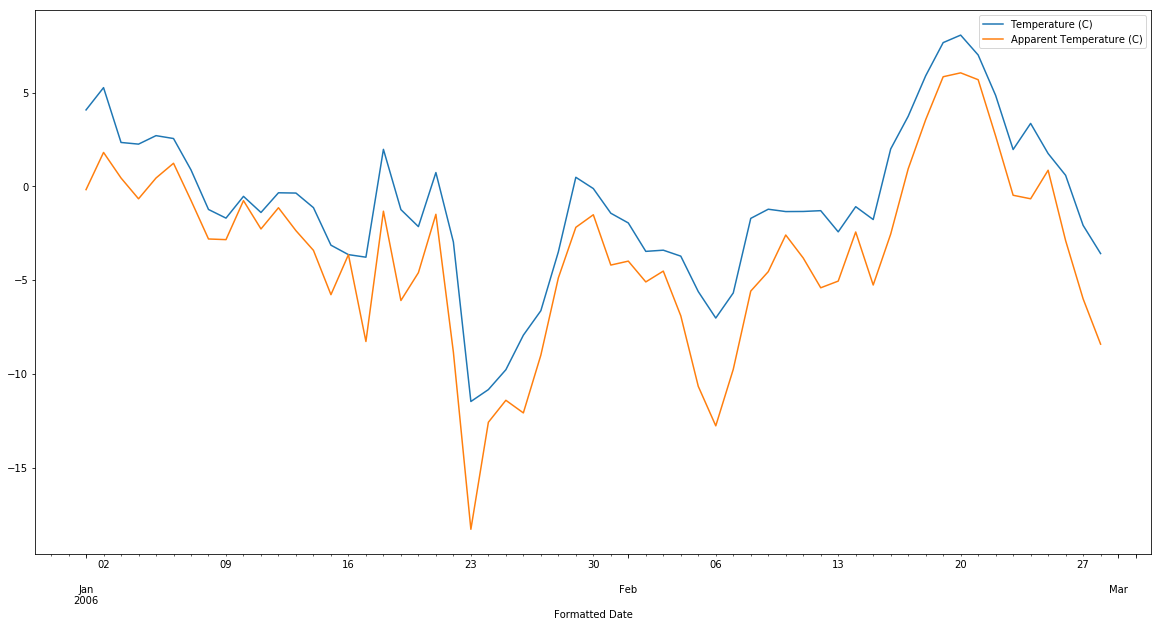

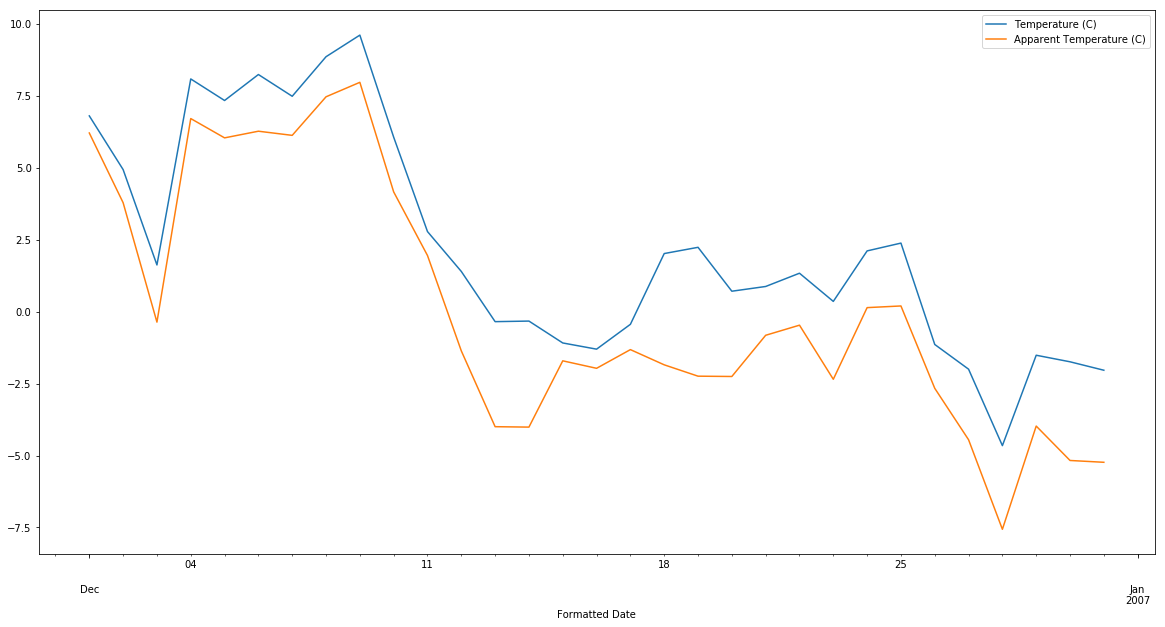

In [56]:
winter.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))
winter2.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

C:\Users\risha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


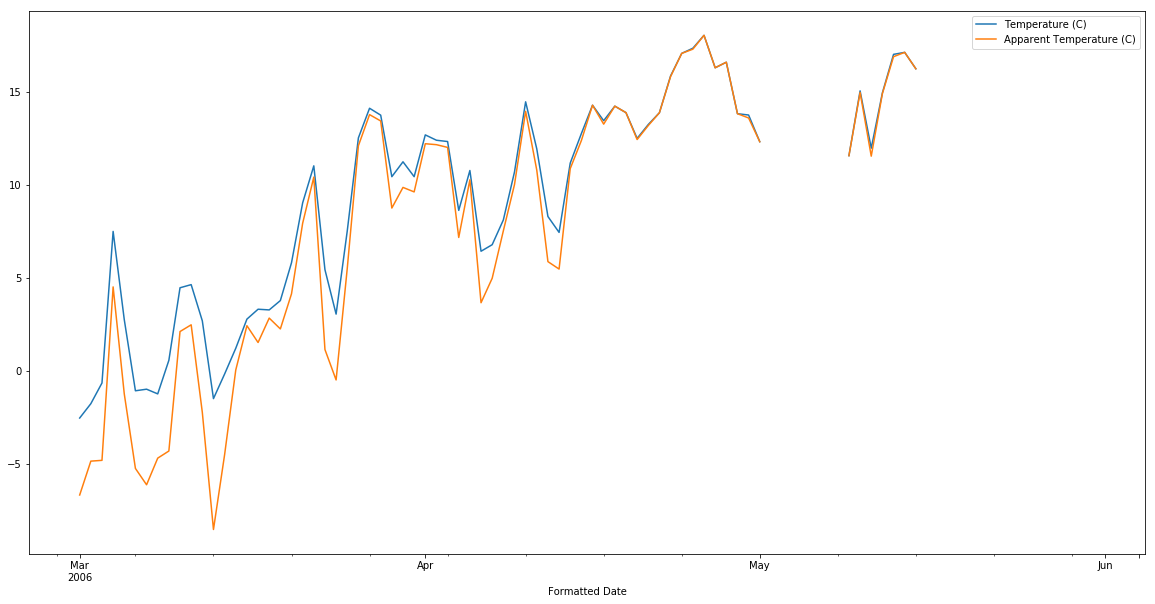

In [57]:
spring.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

C:\Users\risha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


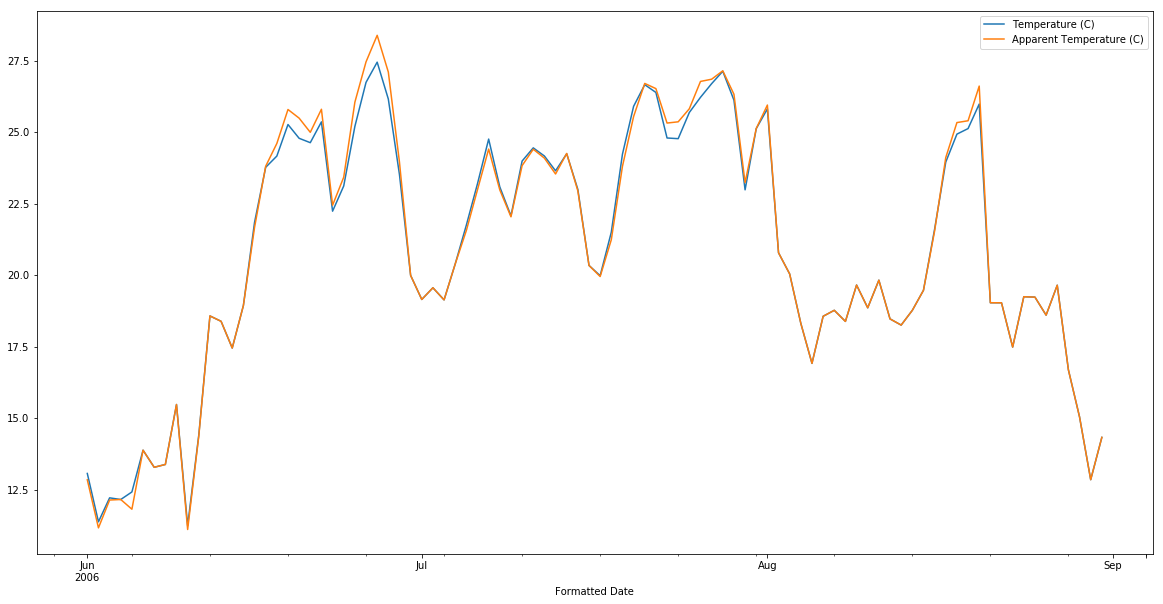

In [58]:
summer.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

# Now Here is Showing the  Correlation in data

In [59]:
#checking correlation between the cols
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


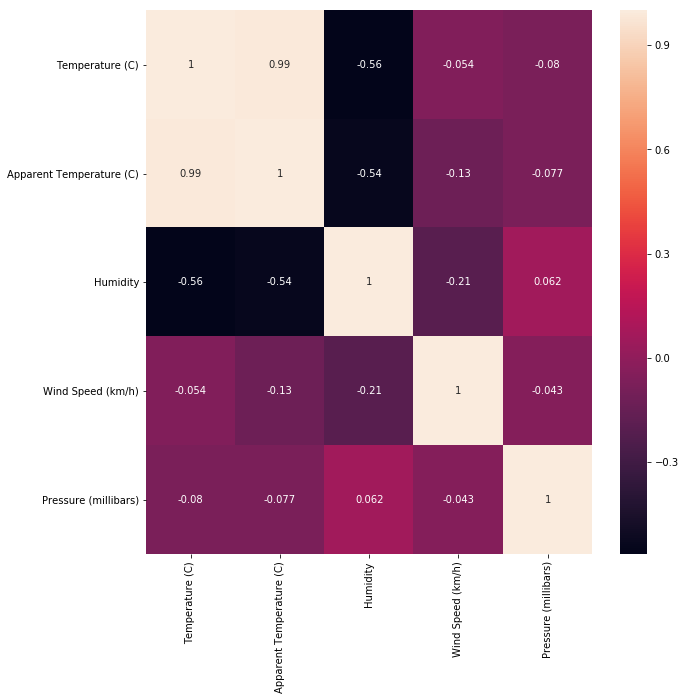

In [60]:
#plotting the correlation
plt.figure(figsize  =(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Visualization

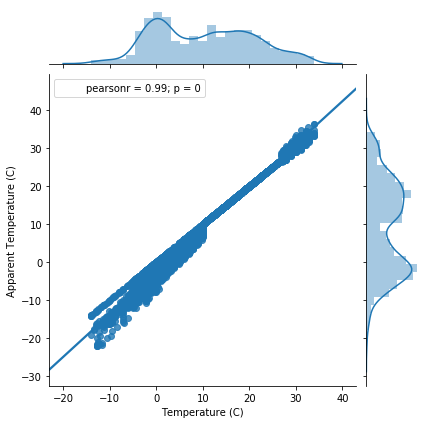

In [61]:
sns.jointplot('Temperature (C)', 'Apparent Temperature (C)',kind="reg", data=df)

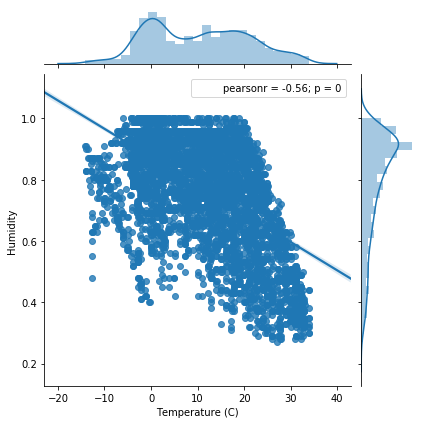

In [63]:
sns.jointplot(kind='reg',y=df['Humidity'],x=df['Temperature (C)'])

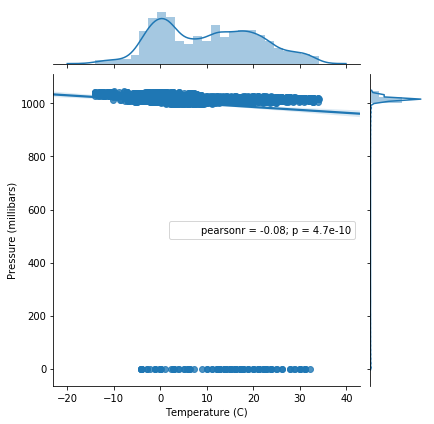

In [64]:
sns.jointplot(kind='reg',y=df['Pressure (millibars)'],x=df['Temperature (C)'])

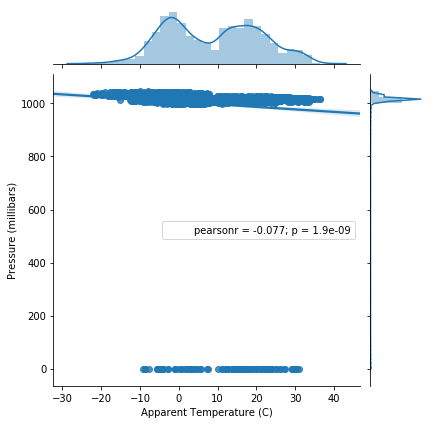

In [65]:
sns.jointplot('Apparent Temperature (C)','Pressure (millibars)',kind="reg", data=df)

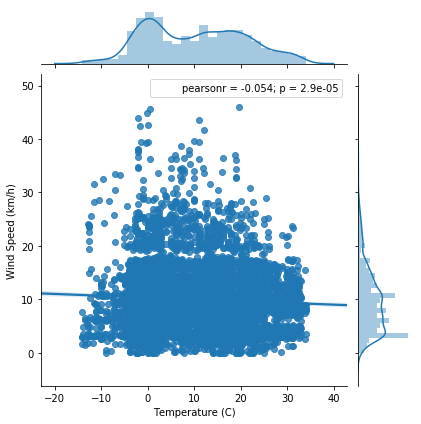

In [66]:
sns.jointplot(kind='reg',y=df['Wind Speed (km/h)'],x=df['Temperature (C)'])

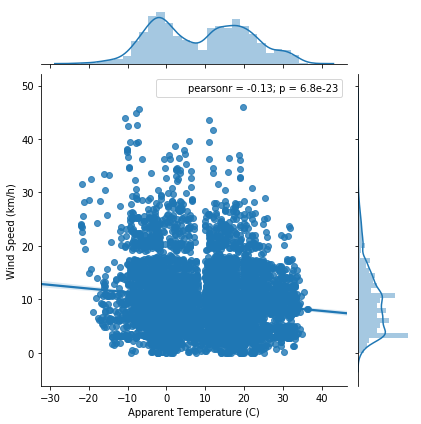

In [67]:
sns.jointplot('Apparent Temperature (C)','Wind Speed (km/h)',kind="reg", data=df)

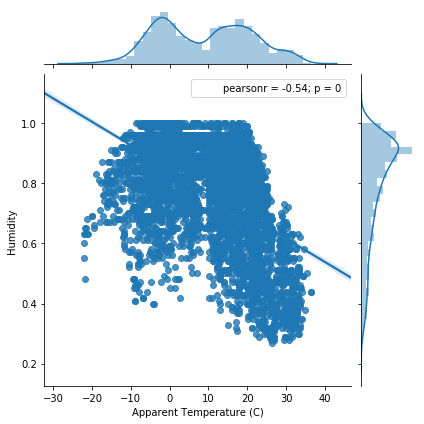

In [68]:
sns.jointplot('Apparent Temperature (C)','Humidity',kind="reg", data=df)

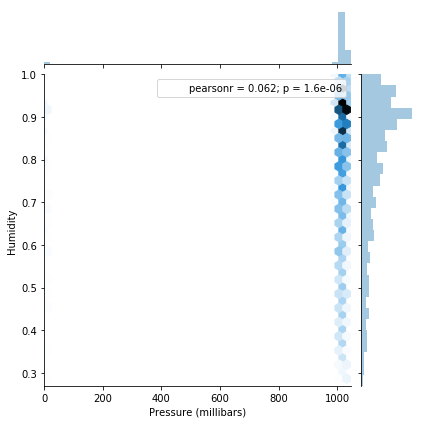

In [69]:
sns.jointplot(kind='hex',y=df['Humidity'],x=df['Pressure (millibars)'])

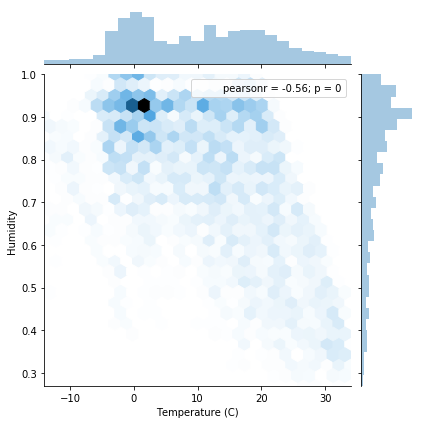

In [70]:
sns.jointplot(kind='hex',y=df['Humidity'],x=df['Temperature (C)'])

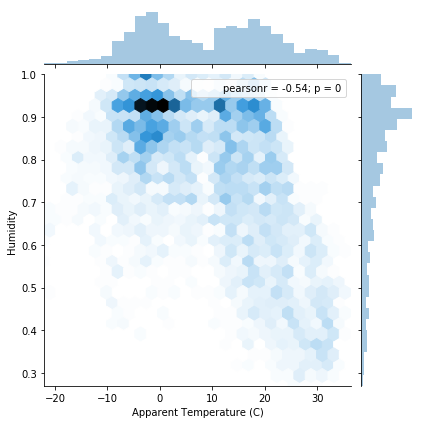

In [71]:
sns.jointplot(kind='hex',y=df['Humidity'],x=df['Apparent Temperature (C)'])

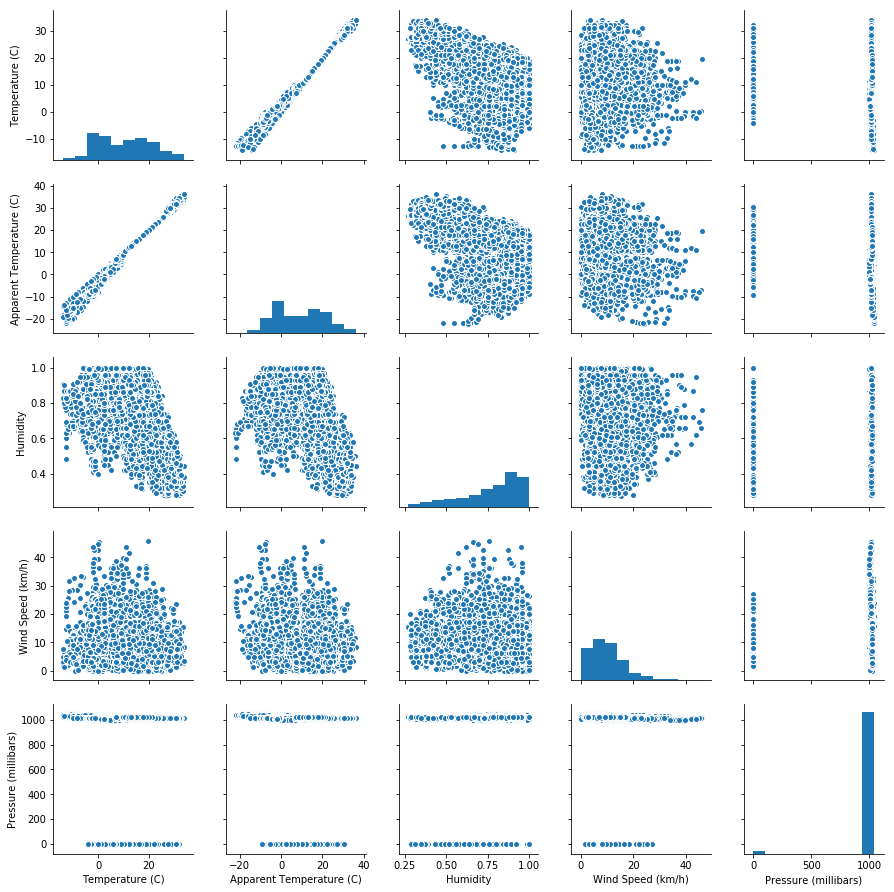

In [73]:
plt.figure(figsize  =(20,20))
sns.pairplot(df)
plt.show()

Note------>> This is all about the complete objective of the project as all three task has been done.